In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.datasets import imdb

##1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора) на датасет from sklearn.datasets import load_boston.

In [2]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
epochs = 10
neurons = 2**6
activation = 'softplus'

## 2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу. Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

## 3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

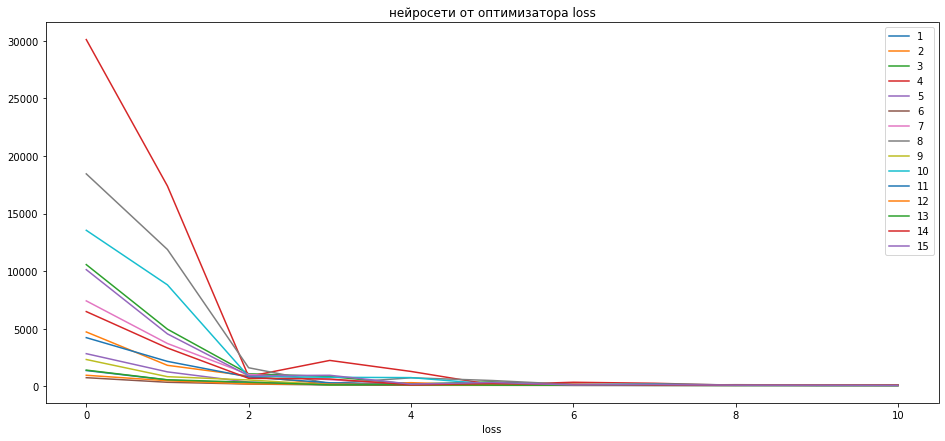

In [4]:
mse_results = pd.DataFrame(columns=['Iterations', 'Train', 'Test']).set_index('Iterations')

epoch = np.arange(epochs+1)

plt.figure(figsize=(16,7))

for i in range(1, 16):

  # create layers
  inputs = Input(shape=X_train.shape[1])
  x = Flatten()(inputs)
  x = Dense(neurons, activation=activation)(x)
  x = Dense(neurons, activation=activation)(x)
  outputs = Dense(1)(x)

  # create model
  model = Model(inputs, outputs)

  # compile
  model.compile(optimizer='Adam',
                loss=MeanSquaredError(),
                metrics=['mse'])

  # calc errors
  hh0_train = model.evaluate(X_train, y_train, verbose=0)

  # fitting
  hh_train = model.fit(X_train, y_train,
                       epochs=epochs,
                       batch_size=64,
                       validation_split=0.2,
                       verbose=0)
  
  hh1_train = model.evaluate(X_train, y_train, verbose=0)
  hh_test = model.evaluate(X_test, y_test, verbose=0)

  mse_results.loc[i, 'Train'] = hh1_train[1]
  mse_results.loc[i, 'Test'] = hh_test[1]

  plt.plot(epoch, [hh0_train[0]] + hh_train.history['loss'], label=i)

plt.legend()
plt.title('нейросети от оптимизатора loss')
plt.xlabel('epoch')
plt.xlabel('loss')
plt.show()

mse_results.loc['max', ['Train', 'Test']] = mse_results['Train'].max(), mse_results['Test'].max()
mse_results.loc['mean', ['Train', 'Test']] = mse_results['Train'].mean(), mse_results['Test'].mean()
mse_results.loc['std', ['Train', 'Test']] = mse_results['Train'].std(), mse_results['Test'].std()

In [5]:
mse_results

,Train,Test
Iterations,,
1,68.9575,49.6999
2,73.4145,63.9072
3,70.0805,60.128
4,68.759,64.0345
5,64.9358,48.8231
6,64.6173,51.2839
7,74.4508,60.7761
8,69.9424,62.4512
9,67.6891,49.4009


### Ответ:
- Средний показатель среднеквадратичной ошибки меньше на Test, чем на Train
- Среднеквадратичное отклонение меньше на Train чем на Test
- Ограничение числа эпох до 12 позволил сделать сеть более стабильной - без резких скачков в результатах
- Чем меньше нейронов - тем меньше среднеквадратичное отклонение, но при этом меньше точность
- Активарор softplus и оптимизатор adam, были выбран в целях стабилизации сети, так как тестирования показали, что они реже приводят к выбросам

## 1-2. (*) Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews. Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?